In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

sns.set(rc={'figure.figsize':(10, 5)})

In [2]:
import yfinance as yf

data = yf.download('^SSE50', period='3y')
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-06-29,2541.350098,2554.800049,2532.459961,2552.979980,2552.979980,19800
2017-06-30,2543.790039,2552.919922,2533.860107,2549.969971,2549.969971,18700
2017-07-03,2550.500000,2550.500000,2522.739990,2534.370117,2534.370117,18300
2017-07-04,2531.530029,2531.610107,2506.679932,2511.149902,2511.149902,23500
2017-07-05,2508.810059,2551.409912,2507.919922,2548.100098,2548.100098,20600


In [3]:
X = data.shift().dropna()
X.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-06-30,2541.350098,2554.800049,2532.459961,2552.979980,2552.979980,19800.0
2017-07-03,2543.790039,2552.919922,2533.860107,2549.969971,2549.969971,18700.0
2017-07-04,2550.500000,2550.500000,2522.739990,2534.370117,2534.370117,18300.0
2017-07-05,2531.530029,2531.610107,2506.679932,2511.149902,2511.149902,23500.0
2017-07-06,2508.810059,2551.409912,2507.919922,2548.100098,2548.100098,20600.0


In [4]:
data['Return'] = np.log(data.Close / data.Close.shift())

data.dropna(inplace=True)

y = data['Target'] = (data.Return>0).astype(int)

data.head()

,Open,High,Low,Close,Adj Close,Volume,Return,Target
Date,,,,,,,,
2017-06-30,2543.790039,2552.919922,2533.860107,2549.969971,2549.969971,18700,-0.001180,0
2017-07-03,2550.500000,2550.500000,2522.739990,2534.370117,2534.370117,18300,-0.006136,0
2017-07-04,2531.530029,2531.610107,2506.679932,2511.149902,2511.149902,23500,-0.009204,0
2017-07-05,2508.810059,2551.409912,2507.919922,2548.100098,2548.100098,20600,0.014607,1
2017-07-06,2543.909912,2561.639893,2534.120117,2553.879883,2553.879883,22200,0.002266,1


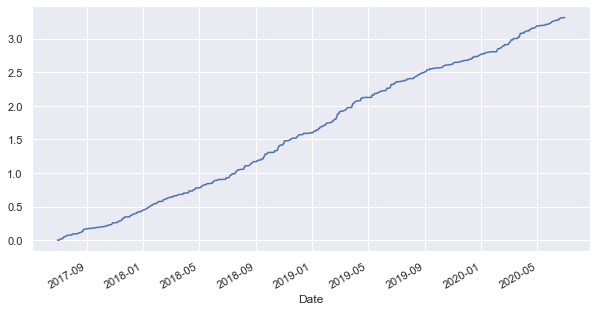

In [5]:
(data.Return * data.Target).cumsum().plot()

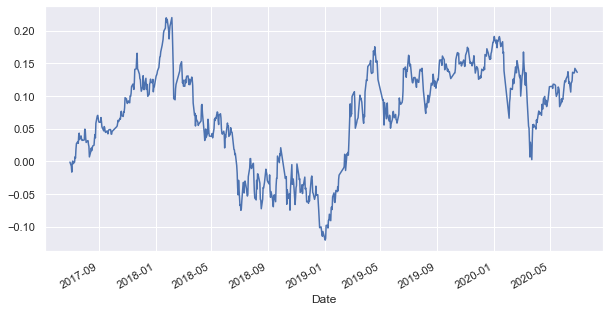

In [6]:
data.Return.cumsum().plot()

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

pipe = Pipeline([('scl', StandardScaler()),
                 ('clf', SVC())])

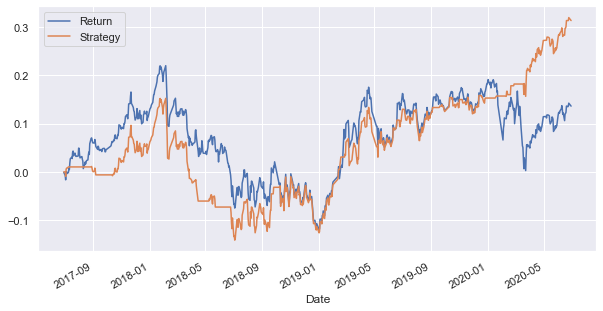

In [9]:
pipe.fit(X, y)

data['Pred'] = pipe.predict(X)
data['Strategy'] = data.Return * data.Pred

data[['Return', 'Strategy']].cumsum().plot()

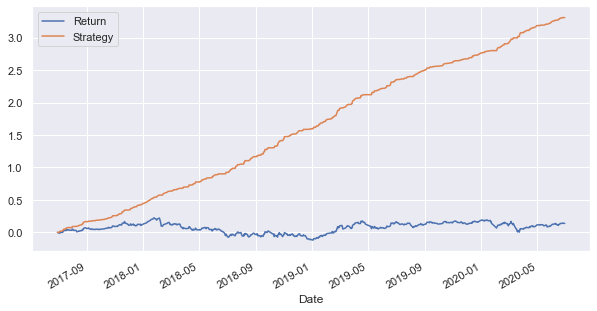

In [18]:
from sklearn.model_selection import GridSearchCV

pipe = Pipeline([('scl', StandardScaler()),
                 ('clf', SVC(C=3.53, gamma=275.86, cache_size=5000))])

# gs = GridSearchCV(pipe, {'clf__C': np.linspace(1, 5)},
#                   n_jobs=-1, cv=2)

# gs.fit(X, y)

# gs.best_params_
pipe.fit(X, y)

data['Pred'] = pipe.predict(X)
data['Strategy'] = data.Return * data.Pred

data[['Return', 'Strategy']].cumsum().plot()

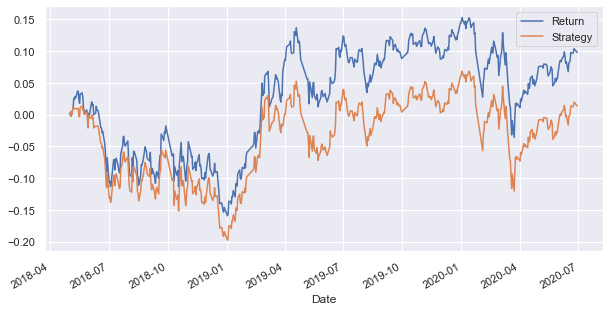

In [21]:
pipe.fit(X.loc[:'2018-5-1'], y.loc[:'2018-5-1'])

data['Pred'] = pipe.predict(X)
data['Strategy'] = data.Return * data.Pred

data.loc['2018-5-1':, ['Return', 'Strategy']].cumsum().plot()